In [1]:
# working with directory
import os

import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.4.0'

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

### Data pre-processing

In [5]:
# check if folder exist and create
def checkFolderExist(directory_path):
    if not os.path.exists(directory_path):
        print("Create folder ...")
        os.mkdir(directory_path)        

In [6]:
directory_path = "./data/mnist"

checkFolderExist(directory_path=directory_path)

In [7]:
# Read data, using one-hot encoding
mnist = input_data.read_data_sets(directory_path, one_hot=True)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


#### Playing with reshape

In [8]:
# shape of input image - training set
mnist.train.images[0].shape

(784,)

In [9]:
test_img = np.reshape(mnist.train.images[9], [28,28]) # 28x28=784

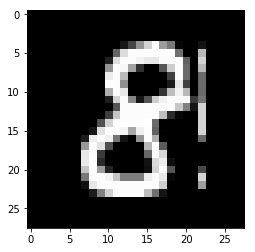

In [10]:
plt.imshow(test_img, cmap="gray")
plt.show()

In [11]:
# try another reshape:
test_img2 = np.reshape(mnist.train.images[9], [-1, 14])    # reshape to 56*14=784
test_img3 = np.reshape(mnist.train.images[9], [-1, 7, 4]) # reshape to 28*7*4=784

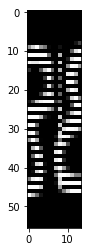

In [12]:
# plot
plt.imshow(test_img2, cmap="gray")
plt.show()

In [13]:
test_img2.shape

(56, 14)

In [14]:
test_img3[:,:,1].shape

(28, 7)

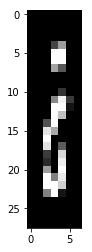

In [15]:
plt.imshow(test_img3[:,:,1], cmap="gray")
plt.show()

#### Test .next_batch

In [16]:
test_list = mnist.train.next_batch(3)

In [17]:
test_list[0].shape

(3, 784)

In [18]:
test_list2 = mnist.train.next_batch(3)

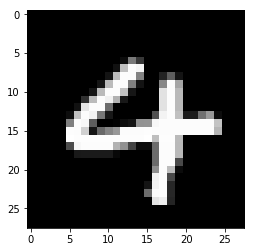

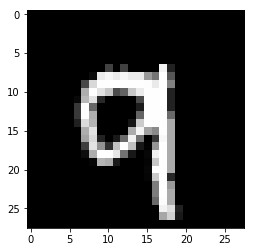

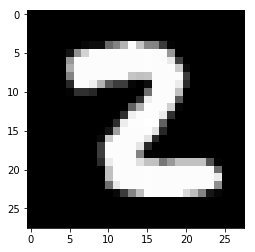

In [19]:
for ite in range(3):
    plt.imshow(np.reshape(test_list[0][ite], [28,28]), cmap="gray")
    plt.show()

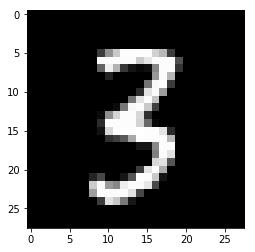

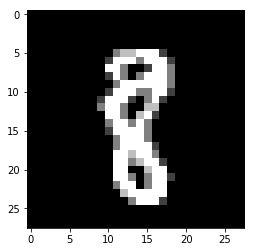

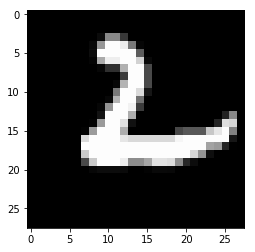

In [20]:
for ite in range(3):
    plt.imshow(np.reshape(test_list2[0][ite], [28,28]), cmap="gray")
    plt.show()

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


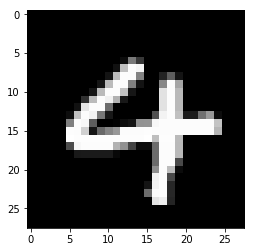

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


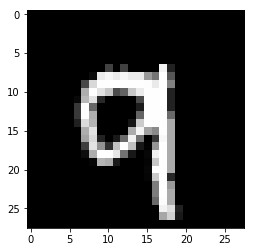

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


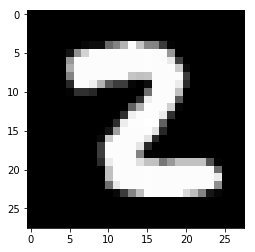

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


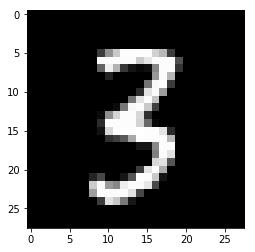

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


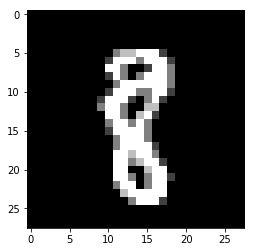

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


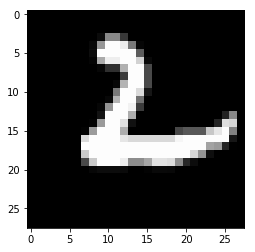

In [21]:
for ite in range(6):
    print(mnist.train.labels[ite])
    plt.imshow(np.reshape(mnist.train.images[ite], [28,28]), cmap="gray")
    plt.show()

In [22]:
# number of examples
mnist.train.num_examples

55000

### Build model

In [23]:
# number of input image
batch_size = 5000
nr_of_batches = int(mnist.train.num_examples/batch_size)

In [24]:
# create placeholder for feature and labels
X = tf.placeholder(dtype=tf.float32, shape=[batch_size, 784], name="X_placeholder") # input image has shape as matrix(1,784)
                                                                                    # push batch_size=100 images at once
Y = tf.placeholder(dtype=tf.float32, shape=[batch_size, 10], name="Y_placeholder")   # 10 classes: 0..9

In [25]:
# create weights and bias
W = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.1), name="W")  # weight matrix, standard deviation
b = tf.Variable(tf.zeros(shape=[1, 10]), name="bias") # bias

In [26]:
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, W) + b 

In [27]:
logits

<tf.Tensor 'add:0' shape=(5000, 10) dtype=float32>

In [28]:
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name="loss")
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

In [29]:
learning_rate = 0.01

In [30]:
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [31]:
epoch = 50

In [32]:
with tf.Session() as sess:
    # initial 
    sess.run(tf.global_variables_initializer())
    
    for i in range(epoch): # train the model n_epochs times
        total_loss = 0

        for ite in range(nr_of_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            opt, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch}) 
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i+1, total_loss))
        
    # save weights and bias values
    [w, b] = sess.run([W, b])

Average loss epoch 1: 13.23177182674408
Average loss epoch 2: 5.623339921236038
Average loss epoch 3: 4.48336386680603
Average loss epoch 4: 4.033227860927582
Average loss epoch 5: 3.7780104279518127
Average loss epoch 6: 3.6096190810203552
Average loss epoch 7: 3.4938242733478546
Average loss epoch 8: 3.3916508555412292
Average loss epoch 9: 3.316077411174774
Average loss epoch 10: 3.245660126209259
Average loss epoch 11: 3.1908720433712006
Average loss epoch 12: 3.1446190178394318
Average loss epoch 13: 3.1022283732891083
Average loss epoch 14: 3.0650367736816406
Average loss epoch 15: 3.031269609928131
Average loss epoch 16: 2.999525249004364
Average loss epoch 17: 2.971274495124817
Average loss epoch 18: 2.950076788663864
Average loss epoch 19: 2.9267818480730057
Average loss epoch 20: 2.9063768684864044
Average loss epoch 21: 2.8863414227962494
Average loss epoch 22: 2.8635860979557037
Average loss epoch 23: 2.8498271107673645
Average loss epoch 24: 2.839114174246788
Average loss 

In [33]:
# checking weights and bias shape
print("weights:", w.shape)
print("bias:", b.shape)

weights: (784, 10)
bias: (1, 10)


### Try to test model with some image

In [34]:
# show the first image in test set
test_set_img = np.reshape(mnist.test.images[0], [28,28])

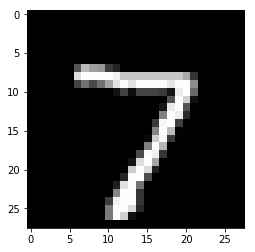

In [35]:
plt.imshow(test_set_img, cmap="gray")
plt.show()

In [36]:
# lets see how the model predicts this number
test_set1 = mnist.test.images[0]

In [37]:
result = np.matmul(test_set1, w) + b

In [38]:
result

array([[ -3.26419497, -15.35779381,  -2.01589584,   3.78278732,
         -5.67937279,  -1.34591544, -13.12367058,   9.09037781,
         -2.06296659,   0.95649105]], dtype=float32)

In [39]:
for ite, val in enumerate(result[0]):
    if (val == max(result[0])):
        print("Predict number:", ite)

Predict number: 7
